<a href="https://colab.research.google.com/github/LosPowerPeralta/ADA-Informes-Matias/blob/main/Informe_Problema_del_Sub_arreglo_m%C3%A1ximo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Problema del Sub-arreglo máximo

Este problema consiste en buscar dentro de un array de largo $n$ un Sub-Arreglo que contenga la suma máxima de elementos dentro del mismo.

Entrada: Una secuencia de $n$ números $[a_1,a_2,...,a_n]$.

Salida: Una secuencia de $m$ números $[a_1',a_2',...,a_m']$ donde $m \leq n$ y a la vez la suma de sus componentes es la mayor que se puede ubicar dentro del array. 

#2. MaxSubArray

##2.1.Descripción del paradigma divide y venceras

Este paradigma consiste en dividir nuestro problema tanto como podamos para que la solución a este se torne "obvia". Para poner un ejemplo, el algoritmo de ordenamiento MergeSort utiliza este paradigma dividiendo un arreglo hasta conseguir sub-arreglos de largo 1, los cuales tomaremos como "Obvio" de que están ordenados ya que solo presentan un elemento.

##2.2. Codigo 

In [32]:
import random as rd
import matplotlib.pyplot as plt
import datetime
import math as mt
from timeit import repeat
from termcolor import colored

In [33]:
def MaxSubArrayMid(lista, mid, cont,verbose):
  if verbose:
    print("Función", colored(f"MaxSubArrayMid()", "yellow"))
    print("Entrada:", str(lista)[1:-1], "\n")

  if len(lista) == 1:
    return lista, lista[0]

  auxI = 0 #Variable que nos indicará desde donde empieza el arreglo con mayor suma
  auxJ = 0 #Variable que nos indicará desde donde finaliza el arreglo con mayor sumaV
  sum = 0
  maxD = -10000000

  #Ciclo que verificará el arrelgo Izquierdo
  if verbose: 
    print("Arreglo a analizar (Mitad Izquierda):", colored(f"{str(lista[:mid])[1:-1]}", "green"), "\n")
  for i in range(mid - 1, -1, -1):
    cont += 1
    sum += lista[i]
    if verbose:
      print(colored(f"{sum}", "red"), ">=", colored(f"{maxD}", "red"))

    if sum > maxD:
      maxD = sum
      auxI = i 

      if verbose:
        print("Nuevo indice inicial para el sub-arreglo mayor:", colored(f"{i}", "blue"))
        print("Suma del sub-arreglo (Parte Izquierda):", colored(f"{maxD}", "yellow"), "\n")
    
  sum = 0
  maxI = -10000000

  #Ciclo que verificará el arreglo Derecho
  if verbose: 
    print("Arreglo a analizar (Mitad Derecha):", colored(f"{str(lista[mid:])[1:-1]}", "green"), "\n")
  for j in range(mid, len(lista)):
    cont += 1
    sum += lista[j]
    if verbose:
      print(colored(f"{sum}", "red"), ">=", colored(f"{maxI}", "red"))

    if sum > maxI:
      maxI = sum
      auxJ = j

      if verbose:
        print("Nuevo indice final para el sub-arreglo mayor:", colored(f"{j}", "blue"))
        print("Suma del sub-arreglo(Parte Derecha):", colored(f"{maxD}", "yellow"), "\n")

  if verbose:
    print("Sub-arreglo resultante:", colored(f"{str(lista[auxI:auxJ + 1])[1:-1]}", "blue"))
    print("Suma total del arreglo: ", colored(f"{maxI + maxD}", "yellow"), "\n")

  return lista[auxI:auxJ + 1], maxI + maxD, cont

In [34]:

def MaxSubArray(lista, cont = 0,verbose= False):
  if verbose:
    print("Función ", colored(f"MaxSubArray()", "yellow"))
    print("Entrada:", str(lista)[1:-1], "\n")

  if len(lista) == 1:
    return lista, lista[0], cont
  
  mid = len(lista) // 2
  listaI = lista[:mid]
  listaD = lista[mid:]

  if verbose:
    print("Mitad Izquierda:", str(listaI)[1:-1])
    print("Mitad Derecha:", str(listaD)[1:-1], "\n")

  maxListaI, sumI, cont = MaxSubArray(listaI, cont,verbose)
  maxListaD, sumD, cont = MaxSubArray(listaD, cont,verbose)
  maxListaMid, sumMid, cont = MaxSubArrayMid(lista, mid, cont, verbose)

  if verbose:
    print("Listas con sus sumas máximas: ")
    print("Lista Izquierda:", str(maxListaI)[1:-1], ", Suma =", sumI)
    print("Lista Derecha:", str(maxListaD)[1:-1], ", Suma =", sumD)
    if len(maxListaMid) == 0:
      print("Lista Media vacía")
    else:
      print("Lista Media:", str(maxListaMid)[1:-1], ", Suma =", sumMid, "\n") 

  if max(sumI, sumD, sumMid) == sumI:
    if verbose:
      print("Retorna:", str(maxListaI)[1:-1], "\n")
    return maxListaI, sumI, cont
  elif max(sumI, sumD, sumMid) == sumD:
    if verbose:
      print("Retorna:", str(maxListaD)[1:-1], "\n")
    return maxListaD, sumD, cont

  if verbose:
    print("Retorna:", str(maxListaMid)[1:-1], "\n")
  return maxListaMid, sumMid, cont


In [38]:
A = [-1,5,8,2,-4,-1]

A, sum, cont = MaxSubArray(A)
print(A, cont)

[5, 8, 2] 16


##2.3. Ejemplo

Para comenzar utilizaremos el siguiente arreglo.

$A = [-1,5,8,2,-4,-1]$

Al ser recibido por la función MaxSubArray, está la divide en 2 hasta conseguir un arreglo de un solo elemento.

$[-1,5,8]...[2,-4,-1]$

$[-1]...[5,8]...[2]...[-4,-1]$

$[-1]...[5]...[8]...[2]...[-4]...[-1]$

A partir de este punto la función MaxSubArray supone que los arreglos recibidos son los que tienen la mayor suma y luego la función anterior revisa que arreglo (derecho o izquierdo) vuelve a tener la mayor suma para retornarlo.

Una vez hecho esto la función MaxSubArray hace el llamado a la función MaxSubArrayMid y esta verifica si la mayor suma se encuentra en un subarreglo entremedio del arreglo original. 

En el arreglo $[5,8]$ la función MaxSubArrayMid sumará los valores que se encuentren en este arreglo, empezando desde el medio y yendo hasta el último elemnto de la derecha y el último elemento de la izquierda.

Al final la función MaxSubArray retorna el sub-arreglo de mayor suma entre la derecha, izquierda y medio.

$[5,8]...[2]...[-1]$

$[5,8,2]...[-1]$

$[5,8,2]$

por lo tanto el arreglo de salida sería 

$A = [5,8,2]$



##2.4. Ejecución del algoritmo paso a paso (Verbose = True)

In [37]:
A = [-1,5,8,2,-4,-1]

A, sum, cont = MaxSubArray(A, verbose= True)
print(A)

Función  MaxSubArray()
Entrada: -1, 5, 8, 2, -4, -1 

Mitad Izquierda: -1, 5, 8
Mitad Derecha: 2, -4, -1 

Función  MaxSubArray()
Entrada: -1, 5, 8 

Mitad Izquierda: -1
Mitad Derecha: 5, 8 

Función  MaxSubArray()
Entrada: -1 

Función  MaxSubArray()
Entrada: 5, 8 

Mitad Izquierda: 5
Mitad Derecha: 8 

Función  MaxSubArray()
Entrada: 5 

Función  MaxSubArray()
Entrada: 8 

Función MaxSubArrayMid()
Entrada: 5, 8 

Arreglo a analizar (Mitad Izquierda): 5 

5 >= -10000000
Nuevo indice inicial para el sub-arreglo mayor: 0
Suma del sub-arreglo (Parte Izquierda): 5 

Arreglo a analizar (Mitad Derecha): 8 

8 >= -10000000
Nuevo indice final para el sub-arreglo mayor: 1
Suma del sub-arreglo(Parte Derecha): 5 

Sub-arreglo resultante: 5, 8
Suma total del arreglo:  13 

Listas con sus sumas máximas: 
Lista Izquierda: 5 , Suma = 5
Lista Derecha: 8 , Suma = 8
Lista Media: 5, 8 , Suma = 13 

Retorna: 5, 8 

Función MaxSubArrayMid()
Entrada: -1, 5, 8 

Arreglo a analizar (Mitad Izquierda): -1 

-1

#3. Tiempo de ejecución

##Teorema (Tiempo de ejecución)

El tiempo de ejecución de este algoritmo en todos sus casos es de $O(nlogn)$.

###**Árbol de recurrencia**

Para demostrar la complejidad de nuestro algoritmo de forma intuitiva necesitaremos hacer uso de un árbol de recurrencia, para esto deberemos definir una función la cual explicará nuestro algoritmo de forma matemática, como por ejemplo:

$T(n) = \begin{cases}
  c  & n \text{ is small} \\
  2 T(n/2) + c \cdot n & \text{ otherwise}
\end{cases}$

Luego de esto podremos armar nuestro árbol de la siguiente forma:

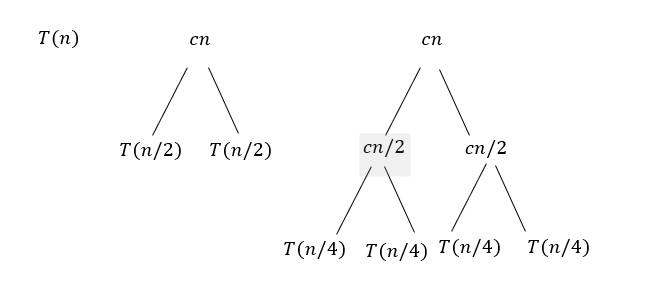

Hasta conseguir el árbol y los resultados de sus aproximaciones.

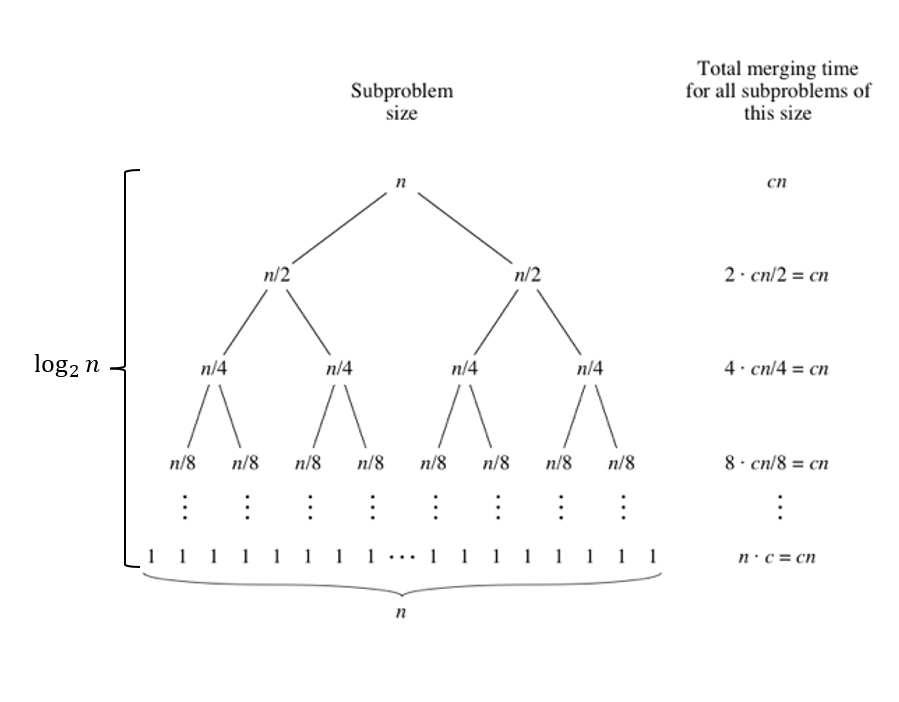

Finalmente analizando el árbol de recursión podemos decir que la suma de todos los tiempode es: $cn \log_2 n \rightarrow O(n \log n)$.

##Prueba del teorema

Teniendo en cuenta el funcionamiento de nuestro algoritmo, este no nos deja del todo claro cual vendría siendo el mejor caso, peor caso o caso promedio, ya que este codigo sin importar el tamaño que tenga irá dividiendo un arreglo largo $n$ en 2 hasta que quede uno de largo 1, ya además la función MaxSubArrayMid verificará todos los espacios del arreglo recibido. Por esta misma razón se realizará una comparación con la cantidad de comparaciones que realiza nuestra función con la aproximación matemática que debería tener gracias a nuestro analisis del árbol recursivo.

In [41]:
for n in range(1,15):
  x = rd.sample(range(-100,100), n)
  a, sum, cont = MaxSubArray(x)
  print("Caso",n,":",x)
  print("Entradas al bucle =", cont, ", Aproximación matemática =", (n * mt.log2(n)) // 1, "\n")

Caso 1 : [14]
Entradas al bucle = 0 , Aproximación matemática = 0.0 

Caso 2 : [98, 49]
Entradas al bucle = 2 , Aproximación matemática = 2.0 

Caso 3 : [17, 59, 86]
Entradas al bucle = 5 , Aproximación matemática = 4.0 

Caso 4 : [72, 3, 7, -24]
Entradas al bucle = 8 , Aproximación matemática = 8.0 

Caso 5 : [-5, -81, -63, -6, 46]
Entradas al bucle = 12 , Aproximación matemática = 11.0 

Caso 6 : [90, -20, 6, -80, -65, -84]
Entradas al bucle = 16 , Aproximación matemática = 15.0 

Caso 7 : [-62, -3, 55, 37, -18, -9, 76]
Entradas al bucle = 20 , Aproximación matemática = 19.0 

Caso 8 : [83, -95, 44, 36, -67, -82, 16, 12]
Entradas al bucle = 24 , Aproximación matemática = 24.0 

Caso 9 : [-1, -22, -15, 33, 89, -89, 60, -98, -73]
Entradas al bucle = 29 , Aproximación matemática = 28.0 

Caso 10 : [90, 7, 53, 84, -40, -28, -39, 79, 71, -96]
Entradas al bucle = 34 , Aproximación matemática = 33.0 

Caso 11 : [-68, -36, 99, -58, -41, -100, -37, 62, -7, 39, 79]
Entradas al bucle = 39 , Apr

Como podemos ver en los calculos, la cantidad de comparaciones que realiza nuestra función es muy cercana al calculo matemático anteriormente mencionado. Por lo tanto podemos asumir que todos los casos del algoritmo tienen una complejidad de $O(nlogn)$.

#4. Correctitud

###Teorema de correctitud

El algoritmo para encontrar el Sub-arreglo máximo recibe como entrada una secuencia de números de tamaño $n$ ($[a_1,a_2,...,a_n]$) y retorna un arreglo de largo $m \leq n$ el cual contendrá la secuencia con la suma máxima $[a_1',a_2',...,a_m']$ donde $\sum\limits_{i = 1}^{n}a_i \leq \sum\limits_{i = 1}^{m}a_i'$.

##Prueba del teorema

Como observamos anteriormente nuestra función MaxSubArray va diviendo nuestro arreglo de tamaño $n$ en sub-arreglos de largo $m = \frac{n}{2}$ hasta conseguir un array de largo 1 y por último nustra función MaxSubArrayMid buscará los sub-arreglos máximos que hay en el medio del arreglo original recorriendolo por completo.

Por lo tanto para la función MaxSubArray podemos demostrarla con inducción matemática y para función MaxSubArrayMid haremos uso de un análisis émpirico.

##Prueba del teorema (Función MaxSubArray)

###**Teorema 1**:

Está función recibirá una secuencia de $n$ números $[a_1,a_2,...,a_n]$
y retornará un sub-arreglo el cual contenga la suma máxima que se encuentre en el arreglo de entrada.

Salida: Una secuencia de $m$ números donde $m \leq n$, $[a_1',a_2',...,a_m']$ donde $\sum\limits_{i = 0}^{n}a_i \leq \sum\limits_{i = 0}^{m}a_i'$.

###Demostración

En inducción matematemática para poder demostrar una declaración $P(n)$ debemos realizar los siguientes pasos.

> 1. Probar un caso base $P(1)$ y comprobar si el algoritmo funciona correctamente.
> 2. Probar si $P(m)$ donde $m < n$ es correcto, por lo tanto para $P(n)$ también lo será.

Para nuestro primer caso, nuestra función rebiría un arreglo de largo $n = 1$. por lo tanto, como este tendrá un solo elemento, se considerará que ese único elemento es la suma máxima. Por lo tanto para nuestro primer caso el algoritmo es correcto.

Para nuestro siguiente paso, la función recibirá un arreglo de largo $n$, este será divido en 2 sub-arrelgos de largo $m = \frac{n}{2}$ y esto ocurrirá hasta que el largo recibido por la función sea de  $m = 1$ como nuestro caso base. Por lo tanto se comprueba que nuestra función MaxSubArray funciona correctamente. 

##Prueba del teorema (Función MaxSubArrayMid)

La función MaxSubArrayMid tiene como entrada un arreglo y la posición media del mismo (mid).

Su proposito es buscar dentro del arreglo un sub-arreglo que contenga la suma máxima de datos para luego retornarlo.

Para probarlo haremos uso de la propiedad invariante de bucle. Para esto debemos analizar la inicialización de nuestros bucles ($i = mid - 1$, $j = mid$) y probar si este se mantiene durante la ejecución de los ciclos.

> Al comienzo de cada iteración $i$ y $j$ serán las variables que irán en aumento en cada bucle, donde $i$ vendría siendo la posición anterior a la mitad del arreglo ingresado y $j$ vendría siendo la posición media de nuestro arreglo. Al finalizar cada bucle debe quedar como arreglo resultante el que tenga la mayor suma de datos.

###**Inicialización:**

Al comienzo de cada iteración (i = mid - 1, j = mid) los arreglos resultantes si o si tendrán la suma máxima de elementos ya que estos estarán compuestos de un solo elemento.

###**Mantención**

Empezamos considerando que al comienzo de cada iteración los arreglos resultantes de cada bucle serán aquellos que contengan la suma máxima de elementos.





#5. Experimentación

##5.1. Número compariciones

* Cantidad de comparaciones para entradas aleatorias, realizadas experimentalmente.
* Cantidad de comparaciones realizadas por el algoritmo Kadane y el de "divide y venceras".
* Comparación en el tiempo de ejecución del algoritmo Kadane y el de "divide y venceras".

Para problemas con $n ∈ [5,60]$.

Los arreglos de entrada son:

* Casos aleatorios: Las secuencias serán arreglos de números entre el -100 y el 100, con $n$ cantidad de elementos.

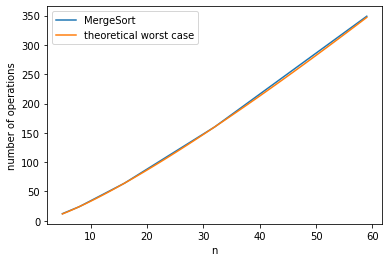

In [43]:
x=[n for n in range(5,60)] 
y1=[n* mt.log2(n) for n in range(5,60)] # caso promedio
y2= []
y=[];

for n in range(5,60):
  a = rd.sample(range(-100, 100), n)
  a,sum,counter  = MaxSubArray(a)
  y.append(counter)

plt.plot(x,y)
plt.plot(x,y1)
plt.legend(["MergeSort", "theoretical worst case", "theoretical best case"])

plt.xlabel('n')
plt.ylabel('number of operations')
plt.show()

Como podemos apreciar en el grafico anterior, la complejidad temporal del caso promedio y el de los casos experimentales son exactamente identicos, por lo tanto podemos confirmar que la complejidad de nuestro algoritmo es de $O(nlogn)$.

##Comparaciones entre la función Kadane y "Divide y venceras"

Los arreglos de entrada serán una secuencia de números aleatorios ya que la función kadane tampoco tiene un mejor o peor caso debido a que siempre tendrá que recorrer todo el array para poder ubicar el sub-arreglo con la suma máxima de elemetos.

##Codigo Kadane

In [74]:
def kadane(lista):
  sumMax = lista[0]
  currentMax = lista[0]
  auxI = 0
  auxJ = 0
  cont = 0

  for i in range(0,len(lista)):
    currentMax += lista[i]
    cont += 1

    if currentMax < lista[i]:
      currentMax = lista[i] 

    if sumMax <= currentMax:
      sumMax = currentMax

  

  return sumMax, cont